In [1]:
#importação do dataset

import pandas as pd

resenha = pd.read_csv("dados//imdb-reviews-pt-br.csv")
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [2]:
# divisão dos dados em treino e teste (caso tente fazer uma regressão irá das erro por não estar vetorizado 
# os dados)

from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [3]:
# vetorização da classificação de sentimentos

classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])

In [4]:
resenha["classificacao"] = classificacao
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [5]:
# vetorização das palavras de cada frase

from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [6]:
# matriz esparsa são matrizes grandes que tem maior parte do seu preenchimento feito por zeros

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                   columns = vetorizar.get_feature_names())

In [7]:
matriz_esparsa

assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [8]:
# Vetorização de cada palavra do dataset, sem diminuir as letras maiusculas e limitando as 50 palavras mais importantes

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [9]:
#função para regressão logistica do dataset

from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                  texto[coluna_classificacao],
                                                                  random_state = 42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [10]:
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [11]:
# criação de uma representação visual das palavras mais repetidas (WordCloud)

%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha["text_pt"]])

nuvem_palavras = WordCloud(width = 800, height = 500,
                           max_font_size = 110,
                           collocations = False).generate(todas_palavras)

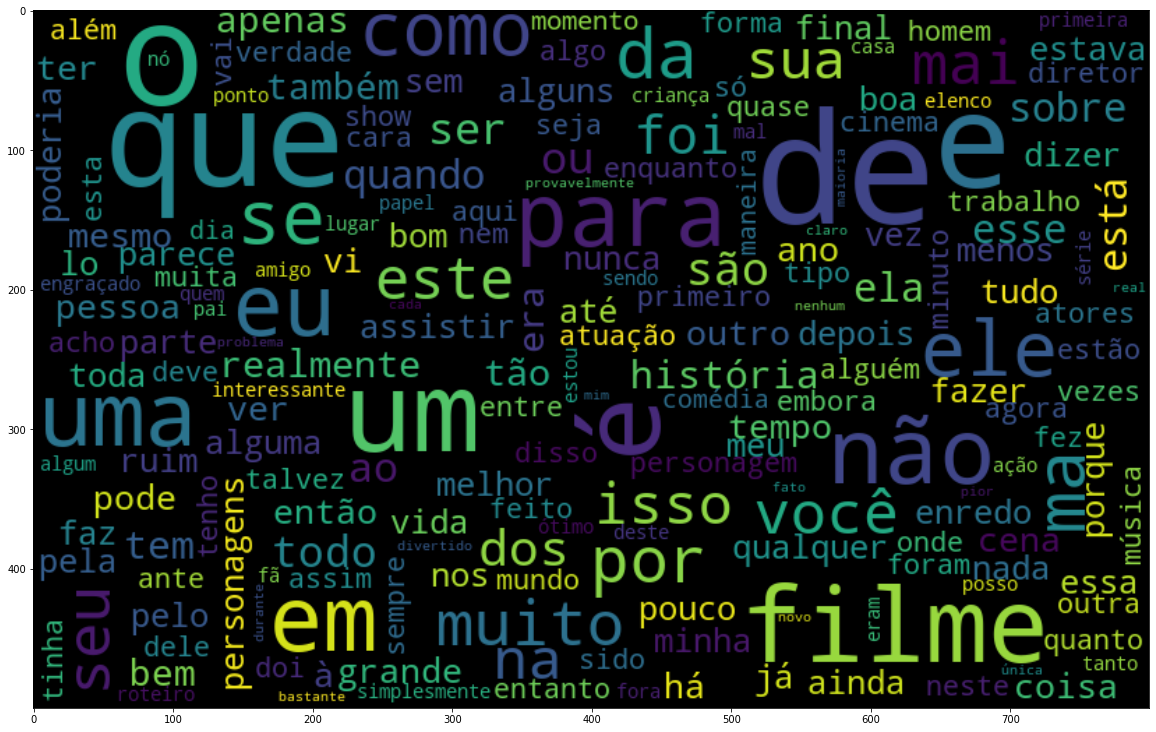

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

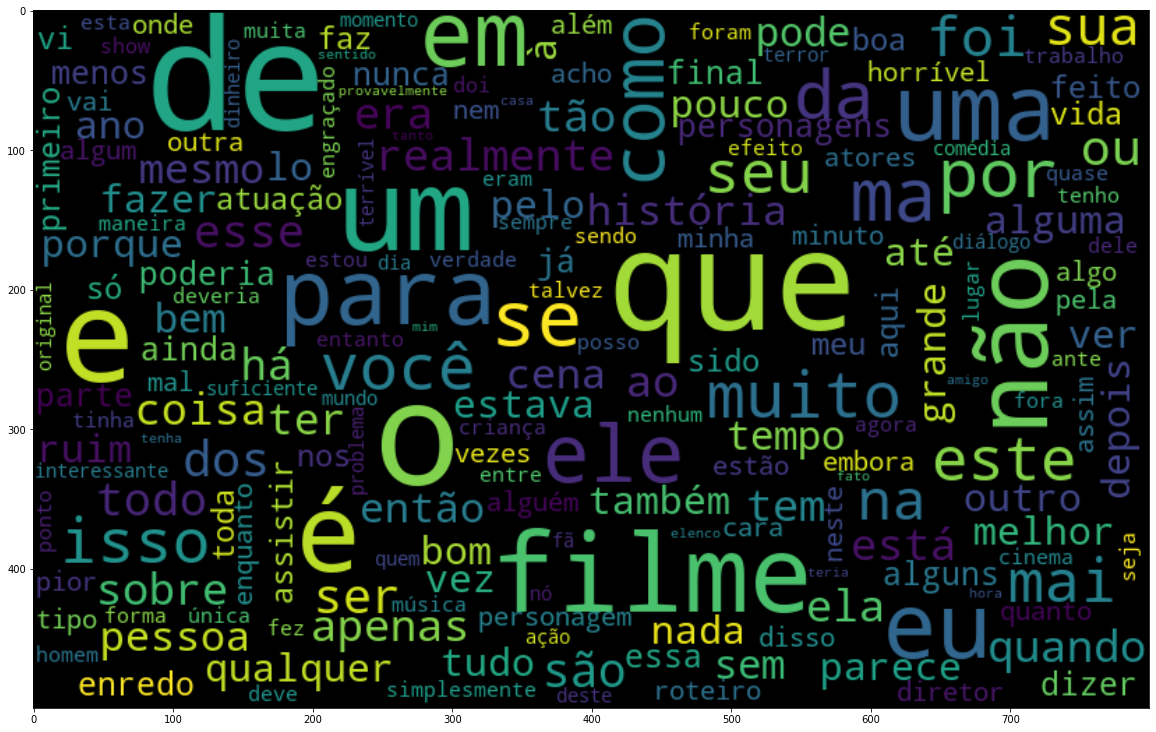

In [13]:
# função para mostrar apenas as palavras que entram na categoria negativa

def nuvem_negativa(texto, coluna_texto):

    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width = 800, height = 500,
                               max_font_size = 110,
                               collocations = False).generate(todas_palavras)

    plt.figure(figsize=(20,14))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.show()
    
nuvem_negativa(resenha, "text_pt")

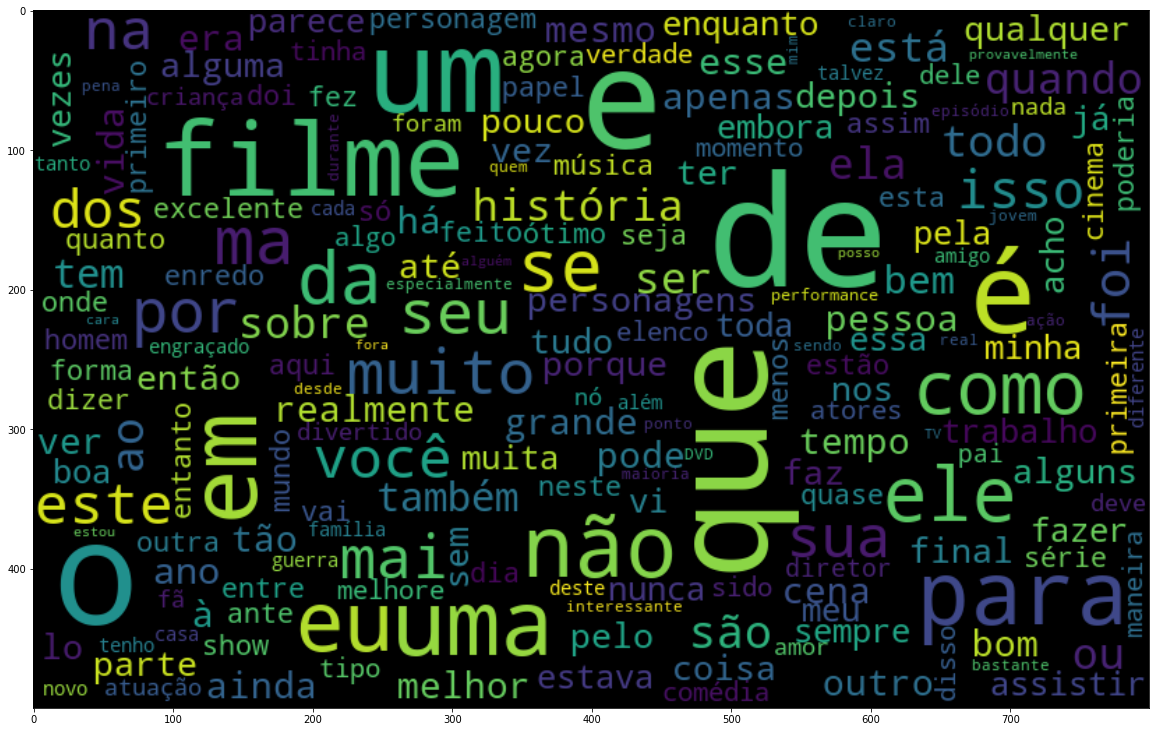

In [14]:
# função para mostrar apenas as palavras que entram na categoria positiva

def nuvem_positiva(texto, coluna_texto):

    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width = 800, height = 500,
                               max_font_size = 110,
                               collocations = False).generate(todas_palavras)

    plt.figure(figsize=(20,14))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.show()
    
nuvem_positiva(resenha, "text_pt")

In [15]:
# calculo da frequencia de cada frase por nltk

import nltk

frase = ["um filme ruim", "um filme bom"] 
frequencia = nltk.FreqDist(frase) #foi calculada apenas a frequência de cada frase
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [16]:
# tokenização das frases (separar cada palavra da frase)

from nltk import tokenize

frase = "Bem vindo ao país das maravilhas"

token_espaço = tokenize.WhitespaceTokenizer()
token_frase = token_espaço.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'país', 'das', 'maravilhas']


In [17]:
token_frase = token_espaço.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase) # calculo da frequência de cada palavra do dataset

In [18]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [19]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})

In [20]:
df_frequencia.nlargest(columns = "Frequência", n = 10) # 10 palavras mais frequentes do dataset

Palavra  Frequência
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

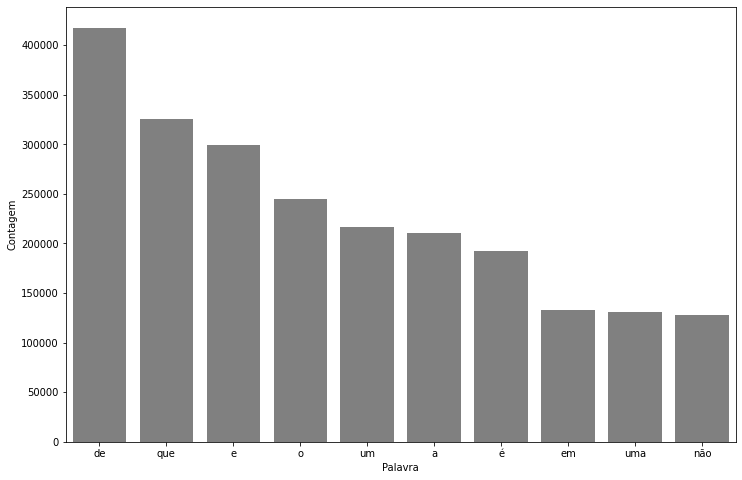

In [24]:
#grafico de pareto para ter uma perspectiva visual das frequencias.

import seaborn as sns

def pareto(texto, coluna_texto, quantidade):

    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaço.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()
    
pareto(resenha, "text_pt", 10)

In [27]:
frase_processada = list()

# criação de uma lista default de palavras irrelevantes (stop words)
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese") 

# remoção das stop words dos textos utilizados
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavra_texto = token_espaço.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
# adição das frases sem stop words ao dataframe
resenha["tratamento_1"] = frase_processada
resenha.head()


id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

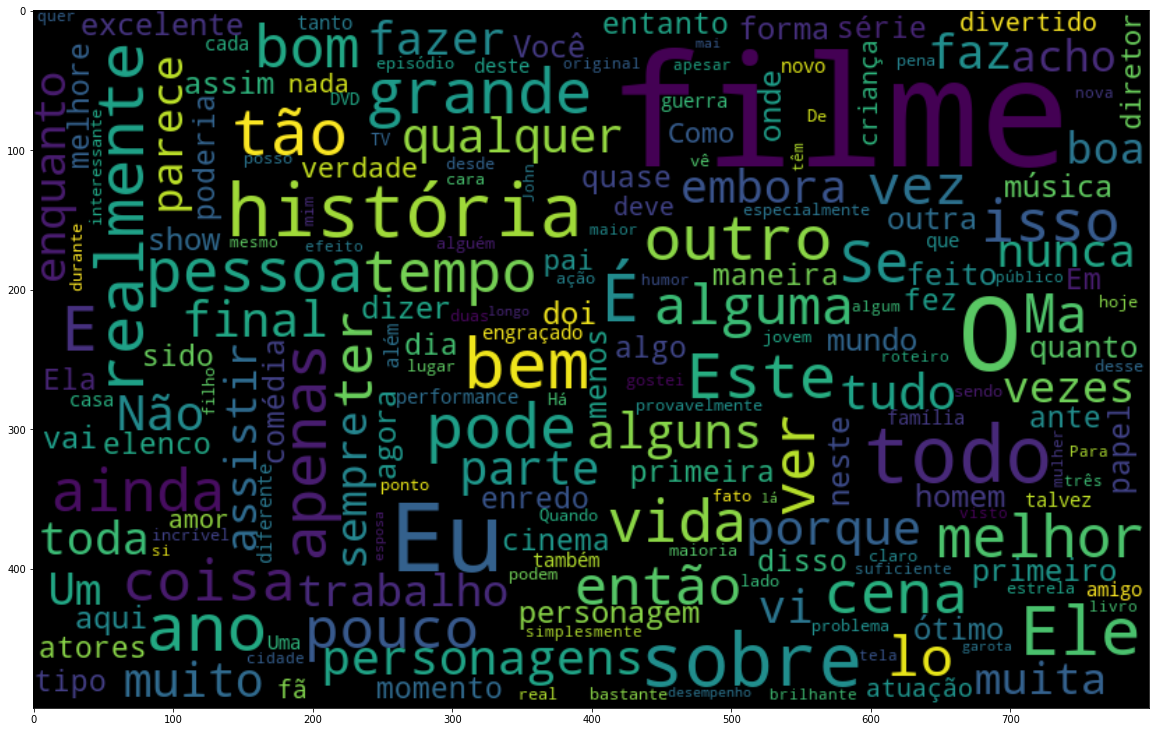

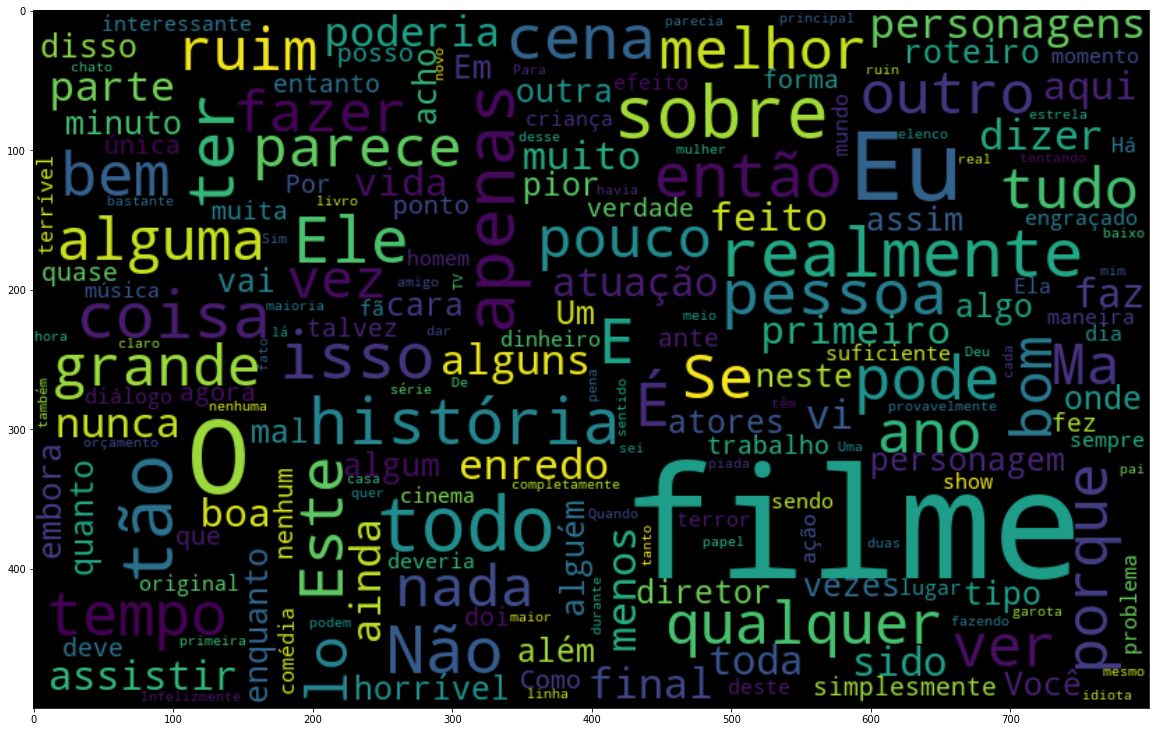

In [28]:
#verificar se muda as palavras mais aparentes no cloud word

nuvem_positiva(resenha, "tratamento_1")
nuvem_negativa(resenha, "tratamento_1")

In [30]:
#verificar se o resultado de analise se tornou melhor
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6811160533764659

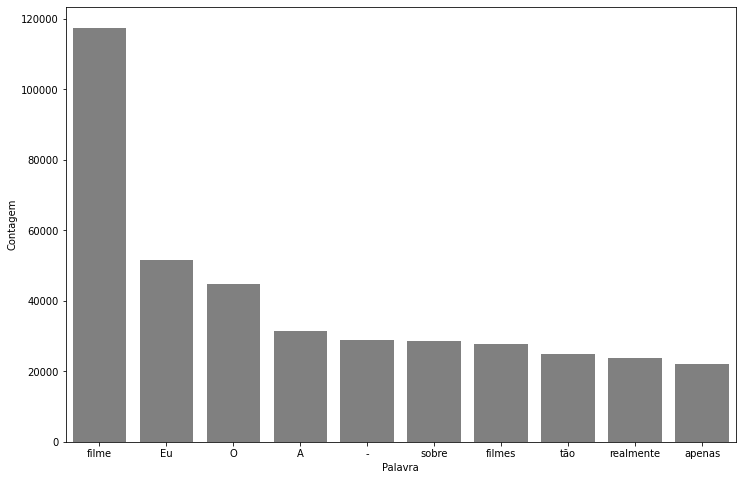

In [31]:
# verificação de pareto das frases tratadas
pareto(resenha, "tratamento_1", 10)

In [35]:
# tokenização de pontuação

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [41]:
# Criando uam lista com as pontuações para remover posteriormente nos textos do dataset

from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes 

# Remoção dos caracteres e palavras que não são de interesse

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_2'] = frase_processada
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

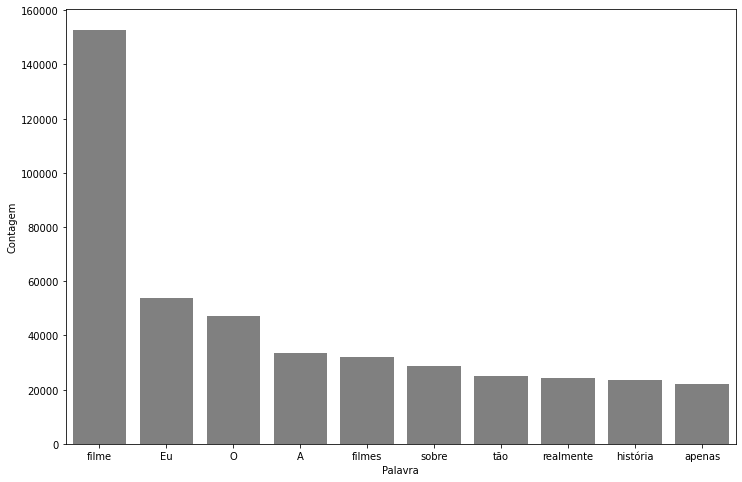

In [42]:
pareto(resenha, "tratamento_2", 10)

In [46]:
# Removendo os acentos das palavras

import unidecode

acentos = "ótimo, péssimo, é, então, padrão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo, pessimo, e, entao, padrao


In [52]:
sem_acento = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]
sem_acento[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [55]:
stopWords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopWords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [61]:
resenha["tratamento_3"] = sem_acento

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [59]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6887990295188031


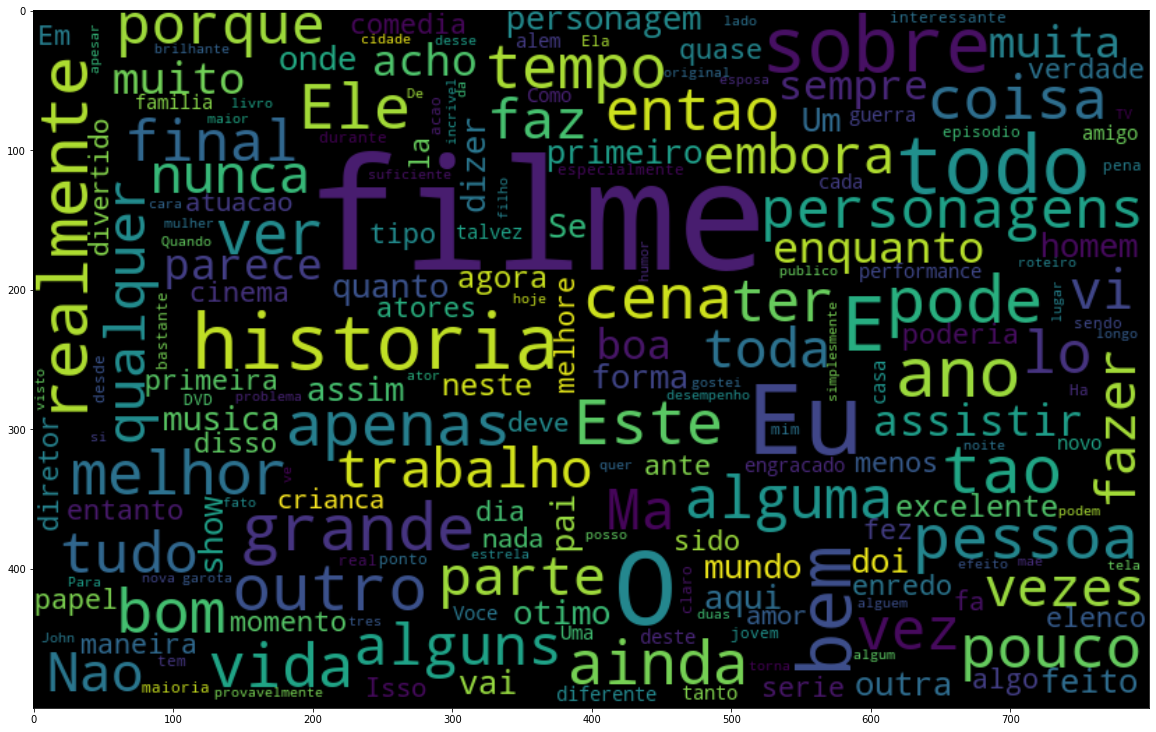

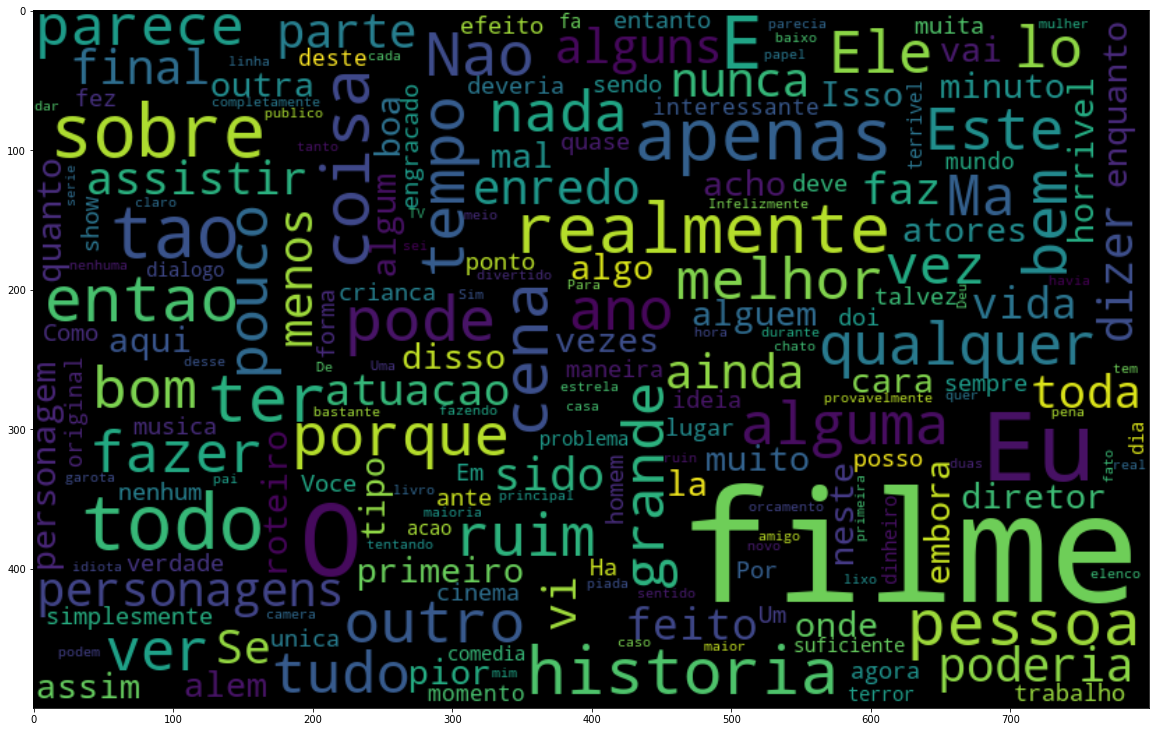

In [60]:
#verificar se muda as palavras mais aparentes no cloud word

nuvem_positiva(resenha, "tratamento_3")
nuvem_negativa(resenha, "tratamento_3")

In [62]:
#tirando as letras maiúsculas das frases

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes acao mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever musicas todos gos...   
4  Filmes fotos latao palavra apropriada verdade ...   

                                        tratamento_4  
0  vez sr costner arrumou filme tempo necessario ...  
1  exemplo motivo maioria filmes acao mesmos gene...  
2  primeiro tudo odeio raps imbecis poderiam agir...  
3  beatles puderam escrever musicas todos gostass...  
4  filmes fotos latao palavra apropriada verdade ...

In [65]:
# Comparação de resultados

acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6909017387788111
0.6887990295188031


In [68]:
# Aplicando stemmer

stemmer = nltk.RSLPStemmer()

frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes acao mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever musicas todos gos...   
4  Filmes fotos latao palavra apropriada verdade ...   

                                        tratamento_4  \
0  vez sr costner arrumou filme tempo necessario ...   
1  exemplo motivo maioria filmes acao mesmos gene...   
2  primeiro tudo odeio raps imbecis poderiam agir...   
3  beatles puderam escrever musicas todos gostass...   
4  filmes fotos latao palavra apropriada verdade ...   

                                        tratamento_5  
0  vez sr costn arrum film temp necessari alem te...  
1  exempl motiv maior film aca mesm gener chat na...  
2  prim tud odei rap imbecil pod agir arm pressio...  
3  beatl pud escrev music tod gost emb walt hill ...  
4  film fot lata palavr apropri verdad tant ous q...

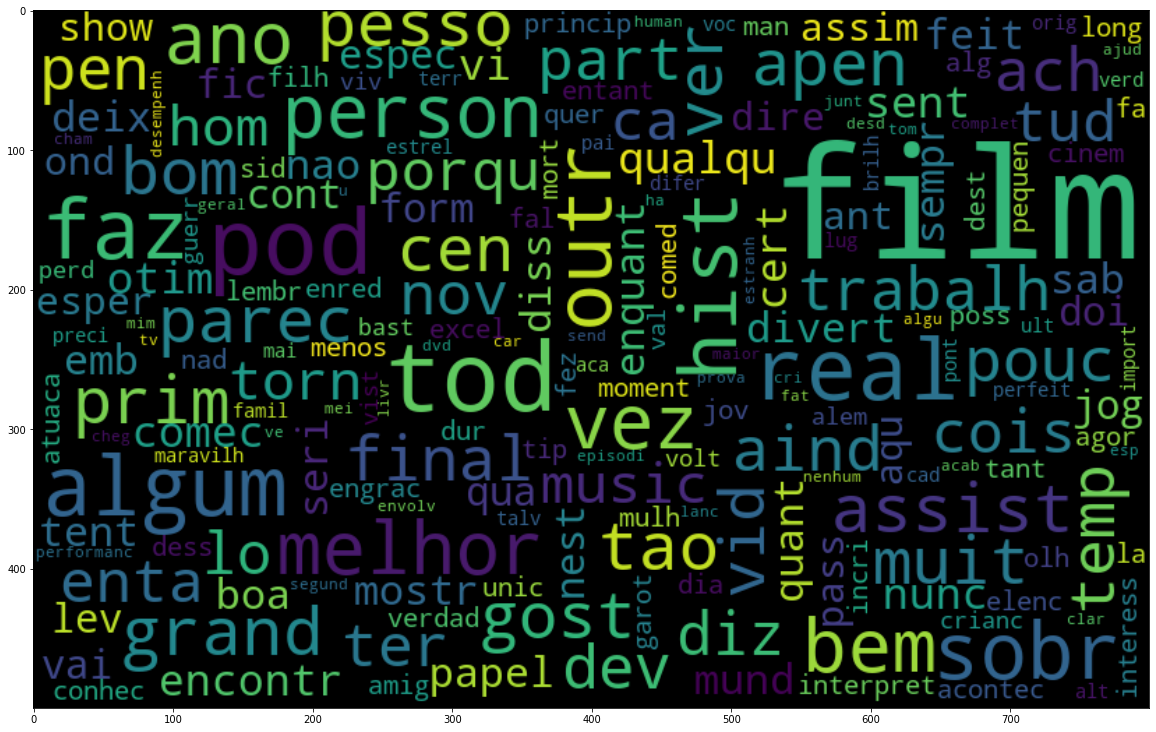

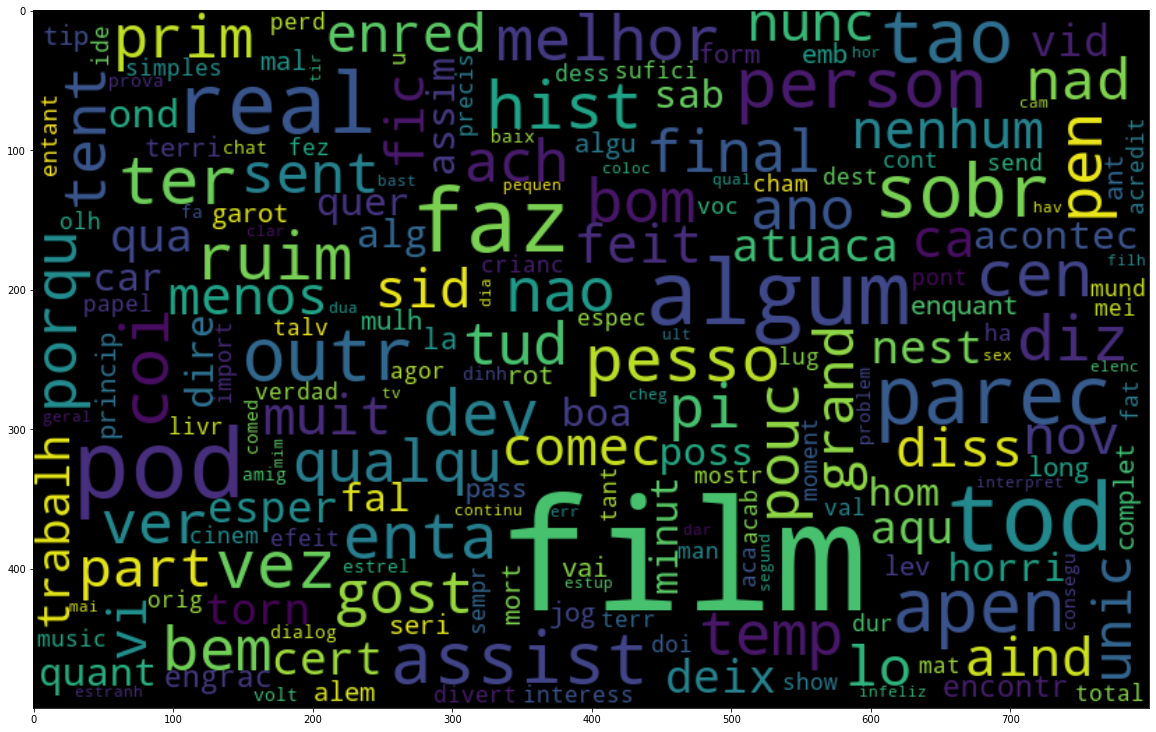

In [69]:
#verificar se muda as palavras mais aparentes no cloud word

nuvem_positiva(resenha, "tratamento_5")
nuvem_negativa(resenha, "tratamento_5")

In [71]:
# Comparação de resultados

acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.7010109179134655
0.6909017387788111


In [73]:
# Aplicando Tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme horrivel"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns = tfidf.get_feature_names()
)

Assisti     filme  horrivel        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [79]:
# Aplicando Tf-idf nos dados do dataset

regressao_logistica = LogisticRegression()

tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, 
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [80]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.7024666397088556


In [81]:
# ngrams

from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaço.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [82]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858067124949454


In [83]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
                                                              resenha["classificacao"], 
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.885321471896482


In [84]:
# verificando as palavras com maior peso

pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
pesos.nlargest(10, 0)

0
otim      8.322344
excel     7.985318
perfeit   6.536425
favorit   5.758966
maravilh  5.294110
incri     5.042598
hilari    4.649395
divert    4.607151
ador      4.381981
brilh     4.241632